<a href="https://colab.research.google.com/github/anjunpil/keras_study/blob/master/simple%20Q-Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import gym
import numpy as np 
import matplotlib.pyplot as plt
from gym.envs.registration import register

dir(register)

register(id='FrozenLake-v3',
         entry_point= 'gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4','is_slippery':False})

env= gym.make('FrozenLake-v3')

Error: ignored

In [72]:
import gym
env = gym.make("FrozenLake-v0")

#0 값으로 초기화 시켜줌
observation = env.reset()

for _ in range(100):
  env.render() #출력
  action = env.action_space.sample() # agent 의 action
  #print(action) #0은 left /1은 down/ 2는 right/ 3은 up
  observation,reward,done,info = env.step(action)
  print(f"observation : {observation}  reward : {reward}\n done : {done} info : {info}")



SFFF
FHFH
FFFH
HFFG
observation : 0  reward : 0.0
 done : False info : {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
observation : 0  reward : 0.0
 done : False info : {'prob': 0.3333333333333333}
  (Right)
SFFF
FHFH
FFFH
HFFG
observation : 1  reward : 0.0
 done : False info : {'prob': 0.3333333333333333}
  (Right)
SFFF
FHFH
FFFH
HFFG
observation : 1  reward : 0.0
 done : False info : {'prob': 0.3333333333333333}
  (Up)
SFFF
FHFH
FFFH
HFFG
observation : 2  reward : 0.0
 done : False info : {'prob': 0.3333333333333333}
  (Right)
SFFF
FHFH
FFFH
HFFG
observation : 6  reward : 0.0
 done : False info : {'prob': 0.3333333333333333}
  (Right)
SFFF
FHFH
FFFH
HFFG
observation : 2  reward : 0.0
 done : False info : {'prob': 0.3333333333333333}
  (Right)
SFFF
FHFH
FFFH
HFFG
observation : 1  reward : 0.0
 done : False info : {'prob': 0.3333333333333333}
  (Up)
SFFF
FHFH
FFFH
HFFG
observation : 1  reward : 0.0
 done : False info : {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HF

## 사용자 입력을 받아 행동하는 게임 실습

In [0]:
import sys,tty,termios

class _Getch:
  
  def __call__(self):
    fd = sys.stdin.fileno()
    old_settings = termios.tcgetattr(fd)

    try:
      tty.setraw(sys.stdin.fileno())
      ch = sys.stdin.read(3)

    finally:

      termios.tcsetattr(fd,termios.TCSADRAIN,old_settings)
    return ch

inkey = _Getch()

#MACROS

LEFT = 0
DOWN = 1
RIGHT =2
UP =3

#key를 받는 코드
#up키 입력시 \x1b[A 입력
arrow_keys={'\x1b[A':UP,
            '\x1b[B':DOWN,
            '\x1b[C':RIGHT,
            '\x1b[D':LEFT,
            }



In [68]:
register(
    id='FrozenLakeL-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False}
)

env = gym.make('FrozenLakeL-v3')

env.render()


SFFF
FHFH
FFFH
HFFG


In [0]:
while True:
  key = inkey()
  if key not in arrow_keys.keys():
    print("Game aborted!")
    break

  action =arrow_keys[key]
  state,reward,done,info = env.step(action)
  env.render()
  print(f"State : {state},Action : {action},Reward : {reward},Info : {info}")

  if done:
    print("Finished with reward",reward)
    break

In [0]:
import gym
env = gym.make("FrozenLake-v0")

#0 값으로 초기화 시켜줌
observation = env.reset()

for _ in range(100):
  env.render() #출력
  action = env.action_space.sample() # agent 의 action
  #print(action) #0은 left /1은 down/ 2는 right/ 3은 up
  observation,reward,done,info = env.step(action)
  print(f"observation : {observation}  reward : {reward}\n done : {done} info : {info}")


In [0]:
# Q 알고리즘 적용 실습

import numpy as np
import random as pr


# 액션을 정하기 위한 알고리즘을 정의 , Q 테이블의 액션 기대값이 가장 큰 액션을 선택 or 기대값이 0 이라면 random하게 액션을 선택

def rargmax(vector):

  m = np.amax(vector)
  #print(m)
  indices = np.nonzero(vector == m )[0]
  #print(indices)
  return pr.choice(indices)


Q = np.zeros([env.observation_space.n,env.action_space.n])
#env.observation_space.n =16
#env.action_space.n =4

#테이블 모든 값 초기화
rList=[]

#파라미터 값 설정
num_episodes = 2000

for i in range(num_episodes):
  state =env.reset()
  rAll =0
  done = False

  # Q learning 알고리즘

  while not done:
    action = rargmax(Q[state,:])

    new_state,reward,done,_ = env.step(action)

    Q[state,action] = reward + np.max(Q[new_state,:])

    rAll+=reward
    state = new_state

  rList.append(rAll)

# 2000번의 에피소드를 정의하고 에피소드가 끝날 때까지 액션을 취하고 최종 보상값을 리스트에 담는다


In [97]:
print("Sucess rate  " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEF DOW RIG UP")
print(Q)

#2000qjs episode 목적지까지 도달한 횟수에 대한 확률, 최종 에피소드 까지 완료 후의 Q 테이블값을 출력

Sucess rate  0.0205
Final Q-Table Values
LEF DOW RIG UP
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]


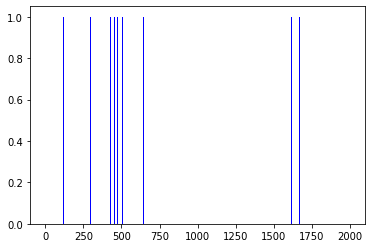

In [98]:
import matplotlib.pyplot as plt
#성공 횟수를 그래픽으로 출력

plt.bar(range(len(rList)),rList,color = "blue")
plt.show()